In [1]:
import pandas as pd

In [12]:
df1 = pd.read_excel("datasets\\Aracaju.xlsx")
df2 = pd.read_excel("datasets\\Fortaleza.xlsx")
df3 = pd.read_excel("datasets\\Natal.xlsx")
df4 = pd.read_excel("datasets\\Recife.xlsx")
df5 = pd.read_excel("datasets\\Salvador.xlsx")

In [13]:
df = pd.concat([df1, df2, df3, df4, df5])

In [14]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [15]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [16]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
32,Aracaju,2018-01-01,42.97,1522,6
114,Fortaleza,2019-03-02,16.82,983,4
101,Salvador,2019-01-01,32.28,1035,3
63,Aracaju,2018-01-01,39.87,1522,5
185,Salvador,2019-01-02,6.67,1036,1


In [17]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [18]:
df["LojaID"] = df["LojaID"].astype("object")

In [19]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [20]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

Nesta parte do vídeo o arquivo que a instrutora está utilizando possui valores nulos na parte de vendas, no meu não, então os passos que ela executa eu não tenho como reproduzir.

Coloquei essa parte como markdown pois não faz sentido executar posteriormente com estes arquivos.

#Substitui os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

#Substitui os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

#Apaga as linhas com valores nulos
df.dropna(inplace=True)

#Apaga as linhas com valores nulos com base em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

#Apaga as linhas com valores nulos que estejam em todas as colunas
df.dropna(how="all", inplace=True)

In [21]:
#Criando novas colunas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [24]:
df["Receita"].max()

3544.0

In [25]:
df["Receita"].min()

3.34

In [26]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [27]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [28]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [29]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [30]:
df["Data"] = df["Data"].astype("int64")

In [31]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [33]:
df["Data"] = pd.to_datetime(df["Data"])

In [34]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [35]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [36]:
df["Ano_Venda"] = df["Data"].dt.year

In [37]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
87,Recife,2019-01-01,210.06,983,4,840.24,2019
39,Natal,2019-01-10,504.00,854,3,1512.00,2019
79,Recife,2019-01-01,14.53,983,6,87.18,2019
54,Natal,2018-10-03,373.00,852,4,1492.00,2018
22,Aracaju,2018-01-01,150.94,1522,1,150.94,2018


In [38]:
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
50,Fortaleza,2019-01-01,33.69,1005,3,101.07,2019,1,1
1,Fortaleza,2019-01-01,115.61,1002,3,346.83,2019,1,1
220,Salvador,2019-01-02,42.71,1035,1,42.71,2019,1,2
87,Aracaju,2018-01-01,116.71,1520,4,466.84,2018,1,1
17,Natal,2018-02-18,276.00,854,3,828.00,2018,2,18


In [40]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [41]:
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
152,Salvador,2019-01-02,20.07,1035,1,20.07,2019,1,2,366 days
45,Natal,2019-03-11,431.00,852,3,1293.00,2019,3,11,434 days
21,Recife,2019-01-01,164.74,983,1,164.74,2019,1,1,365 days
170,Salvador,2019-01-02,9.26,1035,3,27.78,2019,1,2,366 days
107,Salvador,2019-01-01,14.70,1035,1,14.70,2019,1,1,365 days


In [43]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
22,Aracaju,2018-01-01,150.94,1522,1,150.94,2018,1,1,0 days,1
95,Recife,2019-01-01,40.03,982,3,120.09,2019,1,1,365 days,1
32,Salvador,2019-01-01,151.27,1035,1,151.27,2019,1,1,365 days,1
94,Salvador,2019-01-01,33.24,1037,1,33.24,2019,1,1,365 days,1
24,Natal,2018-04-22,868.00,854,3,2604.00,2018,4,22,111 days,2


In [45]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [46]:
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
122,Recife,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,2019,3,2,425 days,1
141,Fortaleza,2019-03-02,182.75,983,8,1462.00,2019,3,2,425 days,1
115,Salvador,2019-03-02,202.33,1035,2,404.66,2019,3,2,425 days,1
127,Recife,2019-03-02,39.56,982,8,316.48,2019,3,2,425 days,1


In [47]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot: >

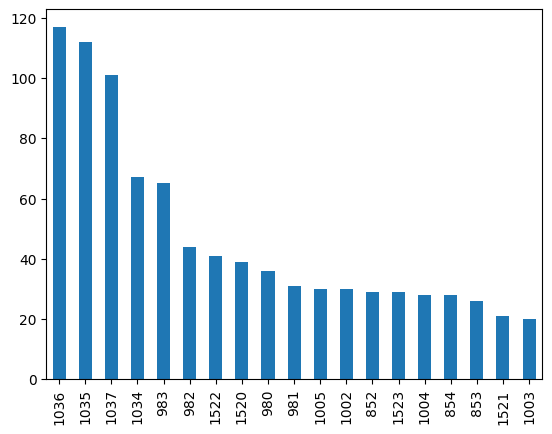

In [49]:
df["LojaID"].value_counts(ascending=False).plot.bar()

<AxesSubplot: >

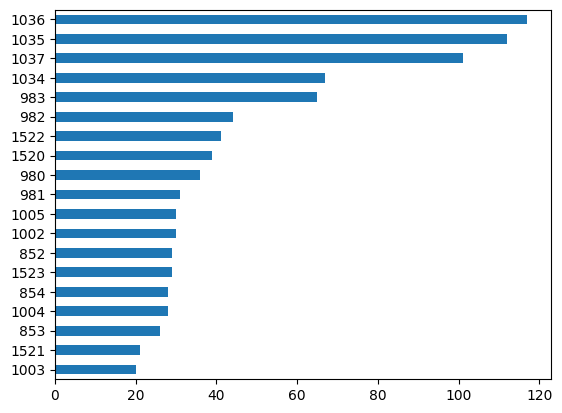

In [50]:
df["LojaID"].value_counts(ascending=True).plot.barh()

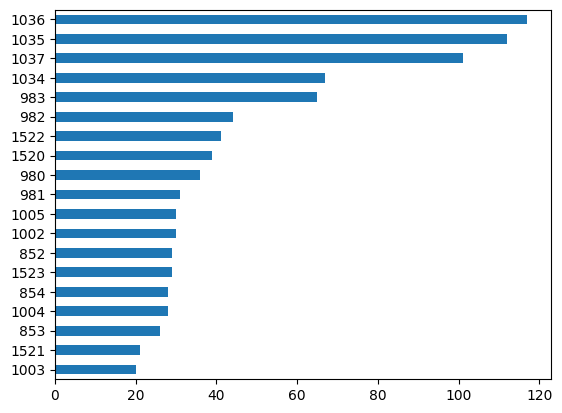

In [51]:
df["LojaID"].value_counts(ascending=True).plot.barh();

<AxesSubplot: ylabel='Receita'>

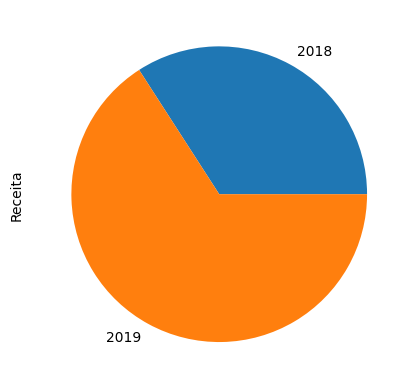

In [52]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [53]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [54]:
import matplotlib.pyplot as plt

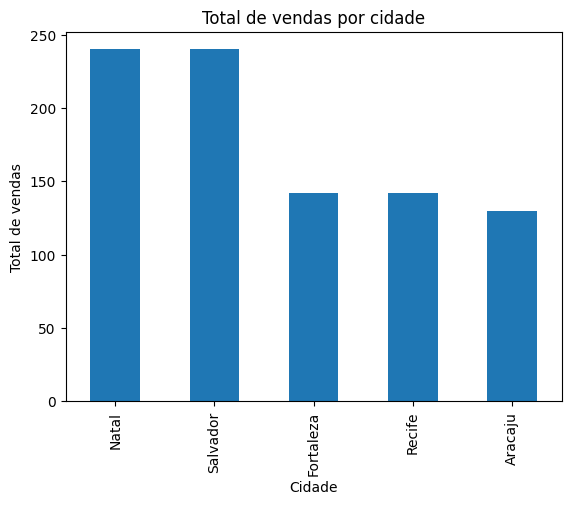

In [55]:
from turtle import title


df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

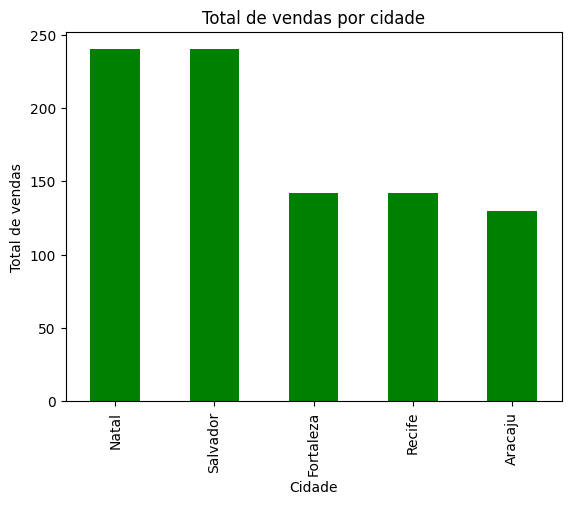

In [56]:
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [57]:
plt.style.use("ggplot")

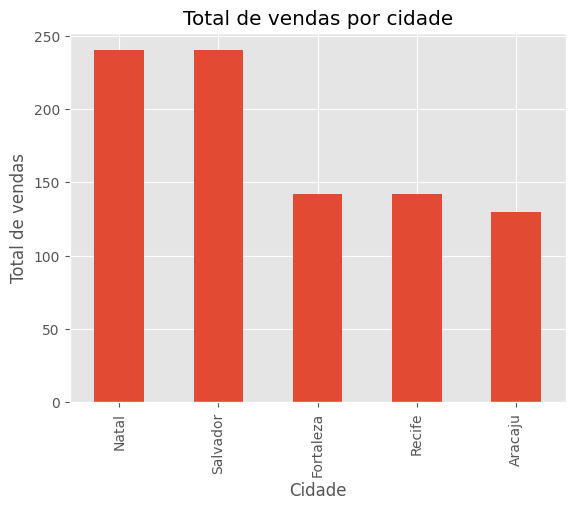

In [58]:
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

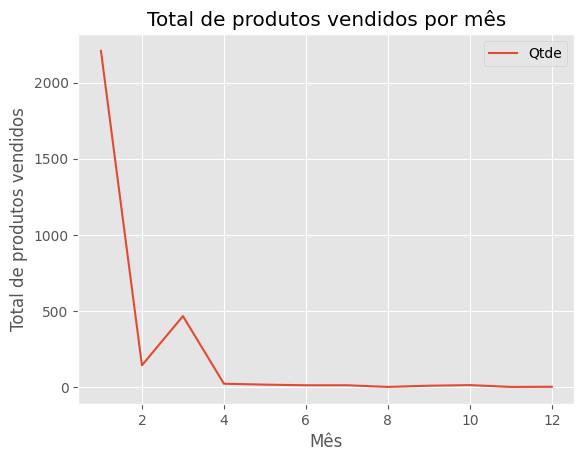

In [59]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [60]:
df_2019 = df[df["Ano_Venda"] == 2019]

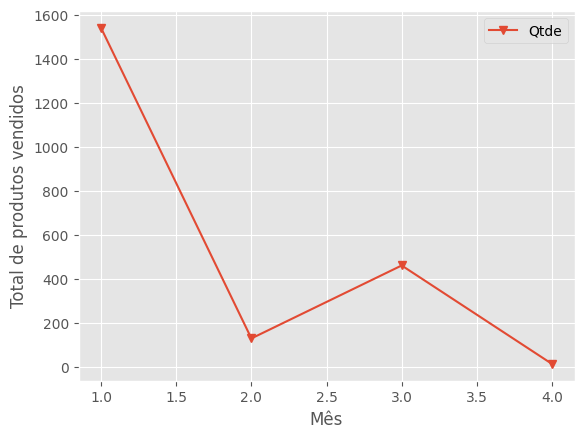

In [66]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

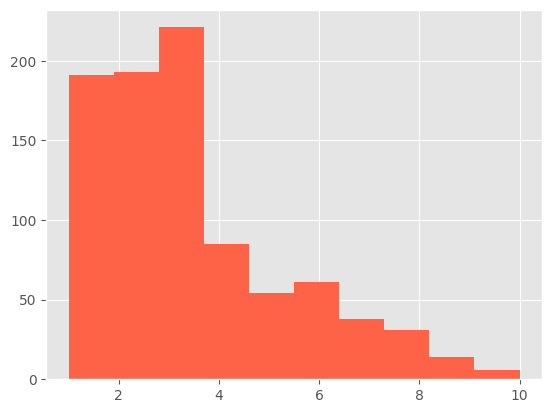

In [68]:
plt.hist(df["Qtde"], color="tomato");

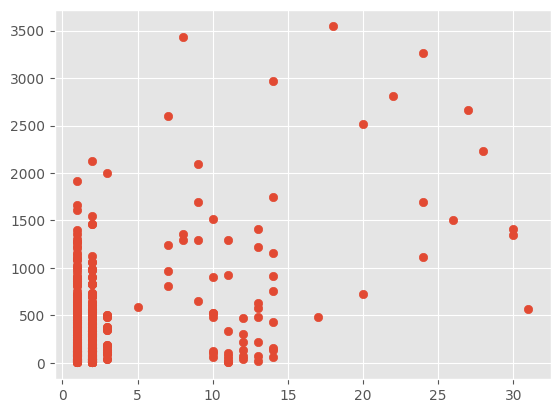

In [69]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

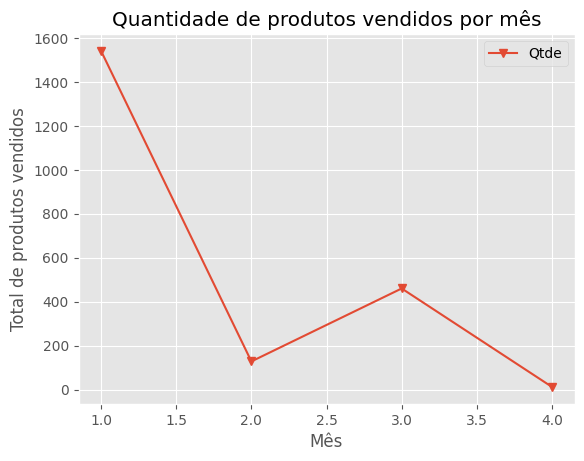

In [71]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title="Quantidade de produtos vendidos por mês", xlabel="Mês", ylabel="Total de produtos vendidos", marker="v")
plt.legend();
plt.savefig("grafico qtde x mes.png")